### Assignment - 1

#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

Use the link to download the dataset:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Define column names based on the dataset description
column_names = ['engine_id', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3',
                'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
                'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
                'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
                'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
                'sensor_21']

# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/PrognosAI_OCT25/Data/raw/test_FD001.txt', sep='\s+', header=None, names=column_names)

# Display shape, info, and head
print("DataFrame Shape:", train_df.shape)
print("\nDataFrame Info:")
train_df.info()
print("\nDataFrame Head:")
display(train_df.head())

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4280115929.py:12: SyntaxWarning: invalid escape sequence '\s'
  train_df = pd.read_csv('/content/drive/MyDrive/PrognosAI_OCT25/Data/raw/test_FD001.txt', sep='\s+', header=None, names=column_names)


DataFrame Shape: (13096, 26)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     13096 non-null  int64  
 1   cycle         13096 non-null  int64  
 2   op_setting_1  13096 non-null  float64
 3   op_setting_2  13096 non-null  float64
 4   op_setting_3  13096 non-null  float64
 5   sensor_1      13096 non-null  float64
 6   sensor_2      13096 non-null  float64
 7   sensor_3      13096 non-null  float64
 8   sensor_4      13096 non-null  float64
 9   sensor_5      13096 non-null  float64
 10  sensor_6      13096 non-null  float64
 11  sensor_7      13096 non-null  float64
 12  sensor_8      13096 non-null  float64
 13  sensor_9      13096 non-null  float64
 14  sensor_10     13096 non-null  float64
 15  sensor_11     13096 non-null  float64
 16  sensor_12     13096 non-null  float64
 17  sensor_13     13096 non

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

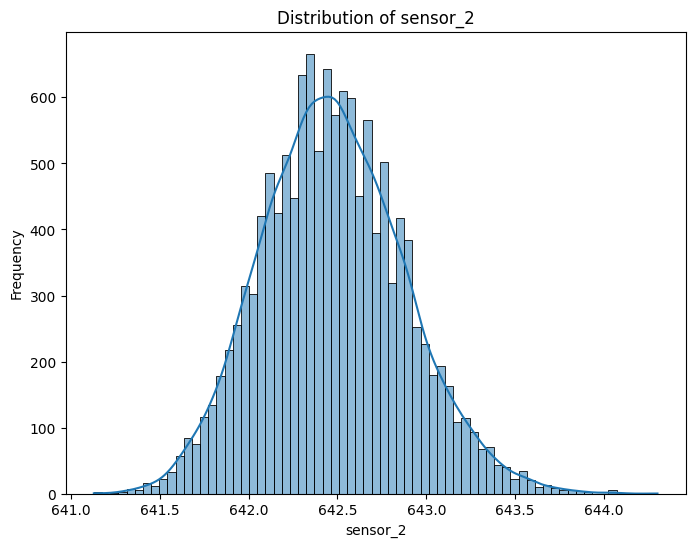

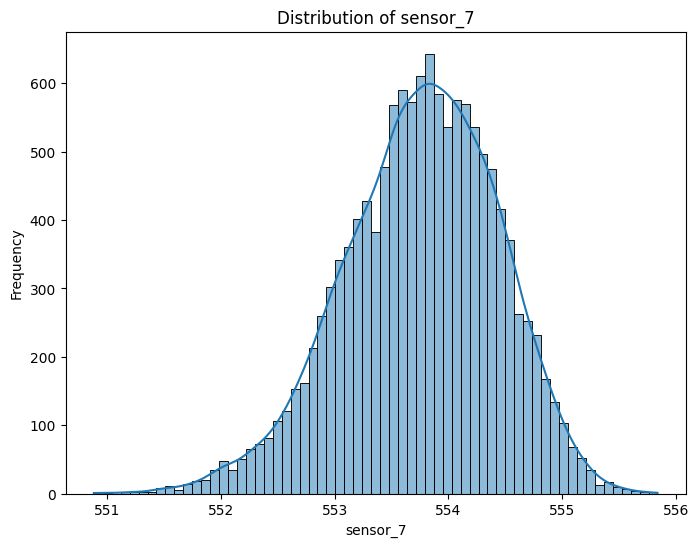

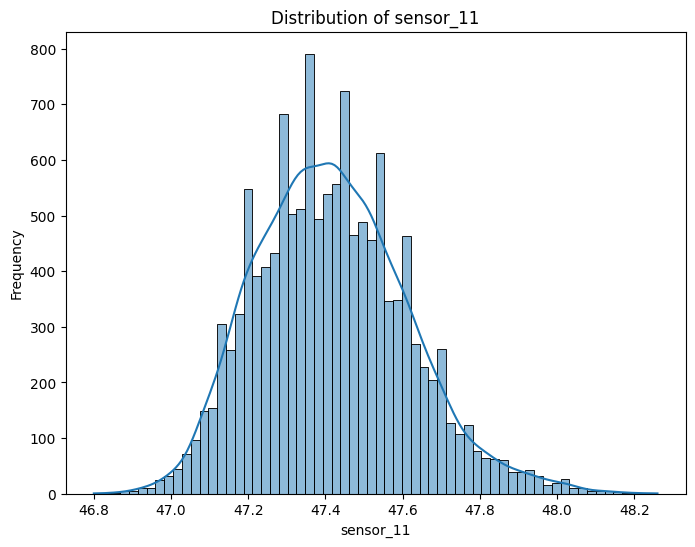


Missing values per column:
engine_id       0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of three sensor columns
selected_sensors = ['sensor_2', 'sensor_7', 'sensor_11']

for sensor in selected_sensors:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=train_df, x=sensor, kde=True)
    plt.title(f'Distribution of {sensor}')
    plt.xlabel(sensor)
    plt.ylabel('Frequency')
    plt.show()

# Check for missing values
print("\nMissing values per column:")
print(train_df.isnull().sum())

#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [2]:
import pandas as pd

# Define column names based on the dataset description
column_names = ['engine_id', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3',
                'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
                'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
                'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
                'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
                'sensor_21']

# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/PrognosAI_OCT25/Data/raw/test_FD001.txt', sep='\s+', header=None, names=column_names)

# Compute the mean and standard deviation of sensor_2 by engine_id
engine_aggs = train_df.groupby('engine_id')['sensor_2'].agg(['mean', 'std']).reset_index()
engine_aggs.columns = ['engine_id', 'sensor_2_mean_by_engine', 'sensor_2_std_by_engine']

# Merge the aggregate features back to the original DataFrame
train_df = train_df.merge(engine_aggs, on='engine_id', how='left')

# Compute the rolling mean (window size=5) for sensor_2 for each engine
train_df['sensor_2_rolling_mean_5'] = train_df.groupby('engine_id')['sensor_2'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Display a few sample rows with the new features
print("DataFrame with new features:")
display(train_df[['engine_id', 'cycle', 'sensor_2', 'sensor_2_mean_by_engine', 'sensor_2_std_by_engine', 'sensor_2_rolling_mean_5']].head())
display(train_df[['engine_id', 'cycle', 'sensor_2', 'sensor_2_mean_by_engine', 'sensor_2_std_by_engine', 'sensor_2_rolling_mean_5']].tail())

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3152146254.py:12: SyntaxWarning: invalid escape sequence '\s'
  train_df = pd.read_csv('/content/drive/MyDrive/PrognosAI_OCT25/Data/raw/test_FD001.txt', sep='\s+', header=None, names=column_names)


DataFrame with new features:


,engine_id,cycle,sensor_2,sensor_2_mean_by_engine,sensor_2_std_by_engine,sensor_2_rolling_mean_5
0,1,1,643.02,642.319032,0.299414,643.020000
1,1,2,641.71,642.319032,0.299414,642.365000
2,1,3,642.46,642.319032,0.299414,642.396667
3,1,4,642.44,642.319032,0.299414,642.407500
4,1,5,642.51,642.319032,0.299414,642.428000


,engine_id,cycle,sensor_2,sensor_2_mean_by_engine,sensor_2_std_by_engine,sensor_2_rolling_mean_5
13091,100,194,643.24,642.380657,0.376903,643.052
13092,100,195,643.22,642.380657,0.376903,643.106
13093,100,196,643.44,642.380657,0.376903,643.210
13094,100,197,643.26,642.380657,0.376903,643.252
13095,100,198,642.95,642.380657,0.376903,643.222


**4. Data Normalization**

Task:

*   Normalize all sensor columns in the DataFrame using StandardScaler from scikit-learn (zero mean, unit variance) and create a new DataFrame, maintaining the original engine_id and cycle columns.
*   Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.



In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate the sensor columns from engine_id and cycle
sensor_cols = [col for col in train_df.columns if 'sensor' in col or 'op_setting' in col]
id_cols = ['engine_id', 'cycle']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the sensor data
normalized_sensor_data = scaler.fit_transform(train_df[sensor_cols])

# Create a new DataFrame with normalized sensor data and original id columns
normalized_df = pd.DataFrame(normalized_sensor_data, columns=sensor_cols)
normalized_df[id_cols] = train_df[id_cols]

# Display the head of the normalized DataFrame
print("Normalized DataFrame Head:")
display(normalized_df.head())

# Check mean and std of normalized data (should be close to 0 and 1)
print("\nMean of normalized sensor data:")
print(normalized_df[sensor_cols].mean())
print("\nStandard deviation of normalized sensor data:")
print(normalized_df[sensor_cols].std())

Normalized DataFrame Head:


,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_2_mean_by_engine,sensor_2_std_by_engine,sensor_2_rolling_mean_5,engine_id,cycle
0,1.049295,1.005927,0.0,0.0,1.359276,-0.561495,-0.975674,-1.776357e-15,0.17566,0.209138,...,-0.463406,0.0,0.0,-0.229408,0.448866,-0.774692,-0.874437,1.872147,1,1
1,-1.220748,-1.034755,0.0,0.0,-1.908502,0.070116,-1.392836,-1.776357e-15,0.17566,1.603612,...,0.347276,0.0,0.0,0.899934,0.664042,-0.774692,-0.874437,-0.352122,1,2
2,0.141278,0.325700,0.0,0.0,-0.037636,-0.231698,-0.507676,-1.776357e-15,0.17566,0.517390,...,0.347276,0.0,0.0,1.323438,0.961247,-0.774692,-0.874437,-0.244588,1,3
3,1.911912,-0.014414,0.0,0.0,-0.087526,-0.795350,0.251888,-1.776357e-15,0.17566,0.458675,...,-1.274088,0.0,0.0,0.758766,0.451244,-0.774692,-0.874437,-0.207800,1,4
4,0.640688,-0.014414,0.0,0.0,0.087088,-0.181729,-0.420954,-1.776357e-15,0.17566,0.590783,...,-2.084769,0.0,0.0,0.688182,0.918450,-0.774692,-0.874437,-0.138185,1,5



Mean of normalized sensor data:
op_setting_1              -1.844720e-17
op_setting_2               3.689440e-17
op_setting_3               0.000000e+00
sensor_1                   0.000000e+00
sensor_2                  -6.189144e-14
sensor_3                   2.346484e-14
sensor_4                  -2.270959e-14
sensor_5                  -1.776357e-15
sensor_6                  -7.298537e-13
sensor_7                   1.135219e-13
sensor_8                  -1.605037e-12
sensor_9                   4.668661e-14
sensor_10                 -2.220446e-16
sensor_11                  9.288708e-15
sensor_12                 -3.867401e-14
sensor_13                  3.660181e-12
sensor_14                  1.493572e-14
sensor_15                 -2.008792e-14
sensor_16                 -1.040834e-17
sensor_17                  7.179216e-15
sensor_18                  0.000000e+00
sensor_19                  0.000000e+00
sensor_20                 -1.147633e-14
sensor_21                  4.266729e-15
sensor_

#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.

In [6]:
import numpy as np
import os

def create_sequences(df, window_size):
    sequences = []
    engine_ids = []
    cycle_ids = []
    # Assuming the normalized_df is available from the previous step
    sensor_cols = [col for col in df.columns if 'sensor' in col or 'op_setting' in col]

    for engine_id in df['engine_id'].unique():
        engine_df = df[df['engine_id'] == engine_id].copy()
        # Ensure data is sorted by cycle
        engine_df = engine_df.sort_values(by='cycle')

        # Create sequences for each engine
        for i in range(len(engine_df) - window_size + 1):
            sequence = engine_df.iloc[i:i+window_size][sensor_cols].values
            sequences.append(sequence)
            engine_ids.append(engine_id)
            cycle_ids.append(engine_df.iloc[i+window_size-1]['cycle']) # Cycle of the last step in the sequence

    return np.array(sequences), engine_ids, cycle_ids

# Define the window size
window_size = 30

# Generate sequences from the normalized data
sequences_array, sequence_engine_ids, sequence_cycle_ids = create_sequences(normalized_df, window_size)

# Print the shape of the resulting sequence array
print("Shape of the resulting sequence array:", sequences_array.shape)

# Print the contents of the first entry
print("\nContents of the first sequence entry:")
print(sequences_array[0])

# Define the directory path
output_dir = '/content/drive/MyDrive/PrognosAI_OCT25/Data/processed/'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the resulting 3D NumPy array
np.save(os.path.join(output_dir, 'sequences.npy'), sequences_array)

# Save the corresponding engine_id and cycle identifier lists as CSV files
pd.DataFrame({'engine_id': sequence_engine_ids}).to_csv(os.path.join(output_dir, 'sequence_engine_ids.csv'), index=False)
pd.DataFrame({'cycle': sequence_cycle_ids}).to_csv(os.path.join(output_dir, 'sequence_cycle_ids.csv'), index=False)


print("\nSequence data, engine IDs, and cycle IDs saved successfully.")

Shape of the resulting sequence array: (10196, 30, 27)

Contents of the first sequence entry:
[[ 1.04929536e+00  1.00592724e+00  0.00000000e+00  0.00000000e+00
   1.35927635e+00 -5.61494661e-01 -9.75674241e-01 -1.77635684e-15
   1.75659965e-01  2.09137586e-01 -5.39077944e-01 -7.20312188e-01
  -2.22044605e-16 -1.10359065e+00 -4.95415753e-02 -7.20590213e-01
  -1.31503071e+00 -7.11659235e-01 -1.04083409e-17 -4.63405876e-01
   0.00000000e+00  0.00000000e+00 -2.29408490e-01  4.48866185e-01
  -7.74691960e-01 -8.74436929e-01  1.87214696e+00]
 [-1.22074812e+00 -1.03475484e+00  0.00000000e+00  0.00000000e+00
  -1.90850157e+00  7.01159004e-02 -1.39283595e+00 -1.77635684e-15
   1.75659965e-01  1.60361233e+00 -1.06136579e+00 -3.48673026e-01
  -2.22044605e-16  4.27726589e-01  7.36726767e-01 -1.93647051e-01
   6.59765273e-02 -1.57003662e+00 -1.04083409e-17  3.47275843e-01
   0.00000000e+00  0.00000000e+00  8.99934085e-01  6.64042490e-01
  -7.74691960e-01 -8.74436929e-01 -3.52122341e-01]
 [ 1.4127796